In [2]:
import os


In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the sales order sheet from Excel
file_location = "/Users/shobana/Downloads/Regional Sales Dataset.xlsx"

In [5]:
! uv pip install openpyxl

Resolved 2 packages in 110ms                                         
Prepared 2 packages in 47ms                                              
Installed 2 packages in 6ms                                 
 + et-xmlfile==2.0.0
 + openpyxl==3.1.5


In [9]:
all_sheets = pd.read_excel(file_location,sheet_name=None)

In [36]:
total_region_sales_sorted = total_region_sales.sort_values(by='total_sales') #sorted the sales order(line total)by asc and order total in regions 

In [37]:
total_region_sales_sorted.head(5)

,Delivery Region Index,total_sales,total_orders
875,877,493367.9,27
838,840,498205.3,34
554,556,511022.4,32
4,5,517320.4,38
42,43,546311.3,34


In [38]:
df_regions = all_sheets['Regions']

In [39]:
df_regions.head()

,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,1,Auburn,Lee County,AL,Alabama,City,32.60986,-85.48078,334,62059,21767,38342,152375113,2646161,America/Chicago
1,2,Birmingham,Shelby County/Jefferson County,AL,Alabama,City,33.52744,-86.79905,205,212461,89972,31061,378353942,6591013,America/Chicago
2,3,Decatur,Limestone County/Morgan County,AL,Alabama,City,34.57332,-86.99214,256,55437,22294,41496,141006257,17594716,America/Chicago
3,4,Dothan,Dale County/Houston County/Henry County,AL,Alabama,City,31.23370,-85.40682,334,68567,25913,42426,232166237,835468,America/Chicago
4,5,Hoover,Shelby County/Jefferson County,AL,Alabama,City,33.37695,-86.80558,205,84848,32789,77146,122016784,2553332,America/Chicago


In [40]:
pd.merge(total_region_sales_sorted, df_regions, left_on='Delivery Region Index', right_on='id', how='inner')# merged the regions and sales order (delivery region index)

,Delivery Region Index,total_sales,total_orders,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,877,493367.9,27,877,Euless,Tarrant County,TX,Texas,City,32.83707,-97.08195,682,54219,21119,54974,41878653,202552,America/Chicago
1,840,498205.3,34,840,Mount Pleasant,Charleston County,SC,South Carolina,Town,32.79407,-79.86259,843,81317,30007,77638,116880751,19480791,America/New York
2,556,511022.4,32,556,Plymouth,Plymouth County,MA,Massachusetts,Town,41.89806,-70.62417,774,58890,21945,76835,249729338,97284253,America/New York
3,5,517320.4,38,5,Hoover,Shelby County/Jefferson County,AL,Alabama,City,33.37695,-86.80558,205,84848,32789,77146,122016784,2553332,America/Chicago
4,43,546311.3,34,43,Apple Valley,San Bernardino County,CA,California,Town,34.50083,-117.18588,760,72174,23727,47938,192802312,855894,America/Los Angeles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,533,2231850.4,111,533,Lafayette,Lafayette Parish,LA,Louisiana,City,30.22409,-92.01984,337,127657,50025,46517,139369271,259576,America/Chicago
989,770,2238764.8,113,770,Union,Broome County,NY,New York,Town,42.12662,-76.03324,607,54995,23992,45958,91859649,1436845,America/New York
990,357,2274428.9,121,357,Brookhaven,DeKalb County,GA,Georgia,City,33.85844,-84.34020,678,51910,21780,69277,29997184,312796,America/New York
991,125,2376697.7,116,125,Menifee,Riverside County,CA,California,City,33.72835,-117.14642,951,87174,27524,55985,120362837,388769,America/Los Angeles


In [43]:
df_salesorders .isnull().sum()

OrderNumber                  0
OrderDate                    0
Customer Name Index          0
Channel                      0
Currency Code                0
Warehouse Code               0
Delivery Region Index        0
Product Description Index    0
Order Quantity               0
Unit Price                   0
Line Total                   0
Total Unit Cost              0
dtype: int64

In [52]:
duplicates = df_salesorders.duplicated()
duplicates.sum()  # total number of duplicate rows


np.int64(0)

In [58]:
df_salesorders.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270


In [57]:
df_products.head()

,Index,Product Name
0,1,Product 1
1,2,Product 2
2,3,Product 3
3,4,Product 4
4,5,Product 5


In [55]:
df_products = all_sheets['Products']

In [60]:
pd.merge(df_salesorders, df_products , left_on='Product Description Index', right_on='Index', how='inner')

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Index,Product Name
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,27,Product 27
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,20,Product 20
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,26,Product 26
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,7,Product 7
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,8,Product 8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2018-02-28,74,Wholesale,USD,AXW291,825,26,12,1815.7,21788.4,980.478,26,Product 26
64100,SO - 0007706,2018-02-28,51,Export,USD,NXH382,444,21,6,864.3,5185.8,579.081,21,Product 21
64101,SO - 0007718,2018-02-28,136,Distributor,USD,AXW291,312,13,11,3953.0,43483.0,2648.510,13,Product 13
64102,SO - 0008084,2018-02-28,158,Distributor,USD,AXW291,737,20,7,3959.7,27717.9,2930.178,20,Product 20


In [270]:
df_salesorders['Order Date'] = pd.to_datetime(df_salesorders['OrderDate'])

In [271]:
df_salesorders_2017 = df_salesorders[df_salesorders['OrderDate'].dt.year <= 2017]

In [272]:
total_product_sales = df_salesorders_2017.groupby('Product Description Index').agg(total_sales=('Line Total', 'sum'),
    product_sold=('Order Quantity', 'count')
).reset_index()

In [273]:
total_product_sales.head() # till year 2017

,Product Description Index,total_sales,product_sold
0,1,53678832.2,2792
1,2,54976803.1,3039
2,3,49935227.3,2702
3,4,54558669.5,2778
4,5,68032711.2,3229


In [67]:
total_product_sales_sorted = total_product_sales.sort_values(by = 'total_sales') # hgvkyujguk

In [274]:
 total_product_sales_sorted.tail()

,Product Description Index,total_sales,product_sold
4,5,70804380.6,3348
13,14,75390396.6,3858
12,13,78281379.6,3948
24,25,109473966.6,5994
25,26,117291821.4,5928


In [69]:
 total_product_sales_sorted.tail(1)

,Product Description Index,total_sales,product_sold
25,26,117291821.4,5928


In [439]:
df_total_product_sales_withnames = pd.merge(total_product_sales, df_products , left_on='Product Description Index', right_on='Index', how='inner')

In [440]:
df_total_product_sales_withnames.head()

,Product Description Index,total_sales,product_sold,Index,Product Name
0,1,53678832.2,2792,1,Product 1
1,2,54976803.1,3039,2,Product 2
2,3,49935227.3,2702,3,Product 3
3,4,54558669.5,2778,4,Product 4
4,5,68032711.2,3229,5,Product 5


In [441]:
df_total_product_sales_withnames_orderby_sales_desc = df_total_product_sales_withnames.sort_values("total_sales", ascending = False)

In [442]:
df_total_product_sales_withnames_orderby_sales_desc.head(1)

,Product Description Index,total_sales,product_sold,Index,Product Name
25,26,112454990.9,5688,26,Product 26


In [443]:
 df_total_product_sales_withnames_orderby_sales_desc.tail(1)

,Product Description Index,total_sales,product_sold,Index,Product Name
8,9,13834836.7,771,9,Product 9


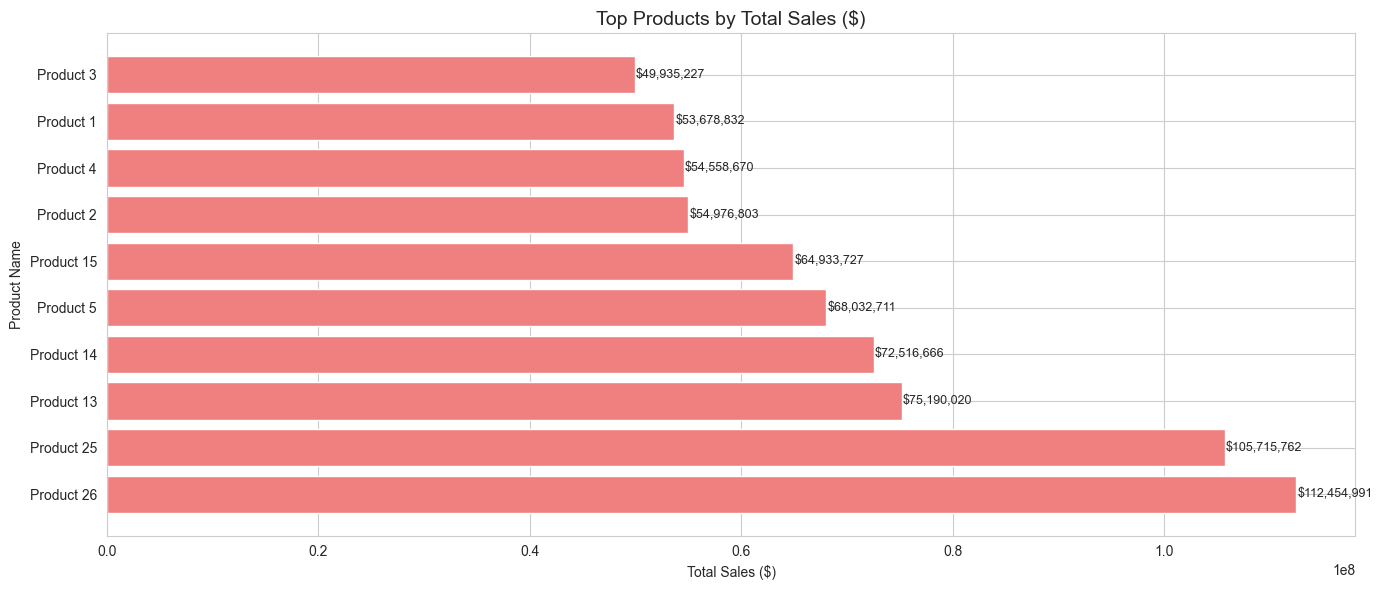

In [508]:

df_plot = df_total_product_sales_withnames_orderby_sales_desc.head(10)  # top 10

plt.figure(figsize=(14,6))
bars = plt.barh(df_plot['Product Name'], df_plot['total_sales'], color='lightcoral')

# Add sales numbers on the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1e5, bar.get_y() + bar.get_height()/2,
             f"${width:,.0f}", va='center', fontsize=9)

plt.title("Top Products by Total Sales ($)", fontsize=14)
plt.xlabel("Total Sales ($)")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()

In [445]:
df_total_product_sales_withnames_orderby_quantity_desc = df_total_product_sales_withnames.sort_values("product_sold", ascending = False)

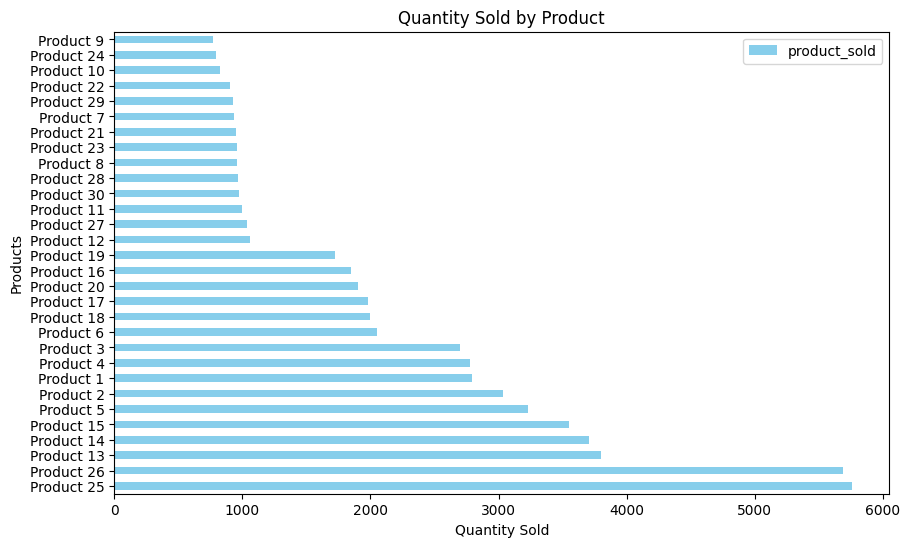

In [446]:
df_total_product_sales_withnames_orderby_quantity_desc.plot(
    y="product_sold", x="Product Name", kind="barh", figsize=(10,6), color="skyblue"
)
plt.title("Quantity Sold by Product")
plt.xlabel("Quantity Sold")
plt.ylabel("Products")
plt.show()

In [100]:
df_state_regions = all_sheets['State Regions']

In [101]:
df_state_regions.head()

,Column1,Column2,Column3
0,State Code,State,Region
1,AL,Alabama,South
2,AR,Arkansas,South
3,AZ,Arizona,West
4,CA,California,West


In [103]:
df_regions = all_sheets['Regions']


In [295]:
df_regions.head()

,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,1,Auburn,Lee County,AL,Alabama,City,32.60986,-85.48078,334,62059,21767,38342,152375113,2646161,America/Chicago
1,2,Birmingham,Shelby County/Jefferson County,AL,Alabama,City,33.52744,-86.79905,205,212461,89972,31061,378353942,6591013,America/Chicago
2,3,Decatur,Limestone County/Morgan County,AL,Alabama,City,34.57332,-86.99214,256,55437,22294,41496,141006257,17594716,America/Chicago
3,4,Dothan,Dale County/Houston County/Henry County,AL,Alabama,City,31.23370,-85.40682,334,68567,25913,42426,232166237,835468,America/Chicago
4,5,Hoover,Shelby County/Jefferson County,AL,Alabama,City,33.37695,-86.80558,205,84848,32789,77146,122016784,2553332,America/Chicago


In [451]:
df_product_quantity = df_sales_till_2017.groupby('Product Name').agg(
    total_quantity_sold=('Order Quantity', 'sum')
).reset_index()

In [452]:
df_product_quantity_sorted = df_product_quantity.sort_values('total_quantity_sold', ascending=False)

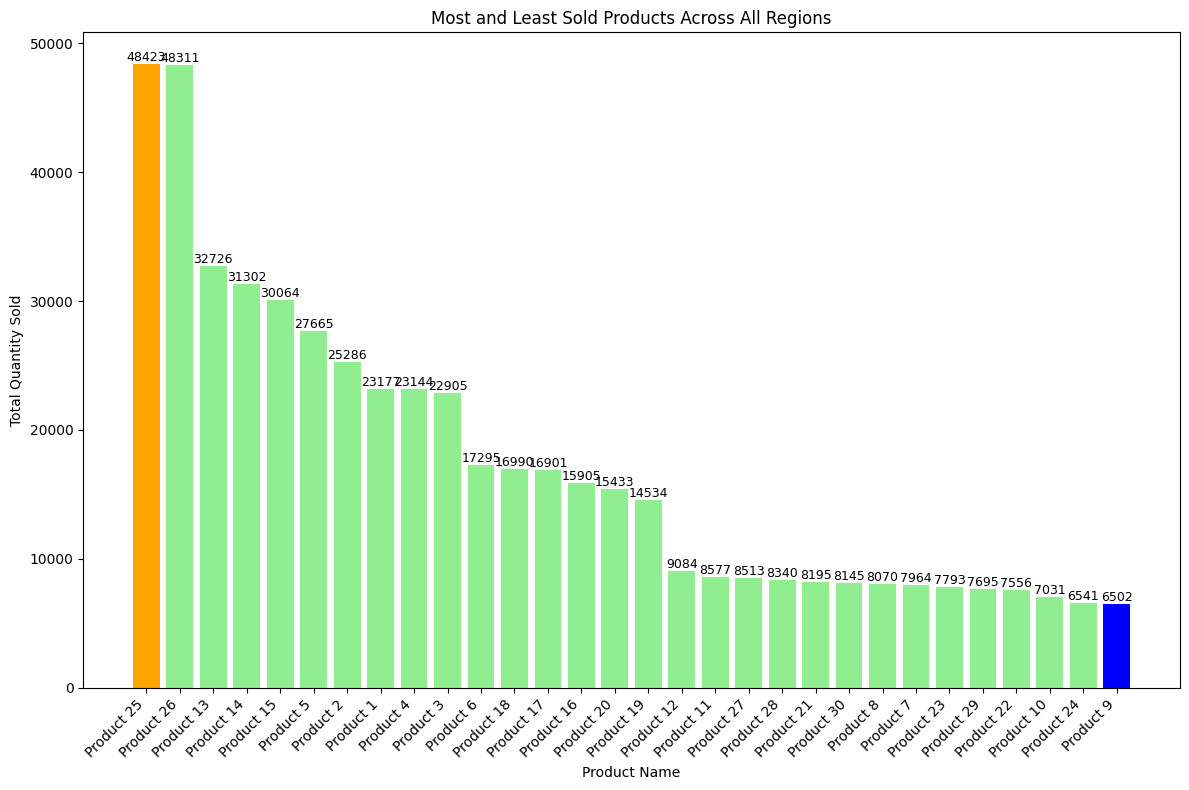

In [454]:
plt.figure(figsize=(12,8))
bars = plt.bar(df_product_quantity_sorted['Product Name'], df_product_quantity_sorted['total_quantity_sold'],
               color=['orange' if x == df_product_quantity_sorted['total_quantity_sold'].max() 
                      else 'blue' if x == df_product_quantity_sorted['total_quantity_sold'].min()
                      else 'lightgreen' 
                      for x in df_product_quantity_sorted['total_quantity_sold']])

# Add numbers on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f"{int(height)}", ha='center', va='bottom', fontsize=9)

plt.title("Most and Least Sold Products Across All Regions")
plt.xlabel("Product Name")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [294]:
df_total_product_sales_region['Year'] = df_total_product_sales_region['OrderDate'].dt.year

In [296]:
df_total_product_sales_region['Year']

0        2014
1        2014
2        2014
3        2014
4        2014
         ... 
64099    2018
64100    2018
64101    2018
64102    2018
64103    2018
Name: Year, Length: 64104, dtype: int32

In [297]:
df_state_regions = pd.read_excel("/Users/shobana/Downloads/Regional Sales Dataset.xlsx", sheet_name="State Regions", header=0)


In [298]:
df_state_regions.head()

,Column1,Column2,Column3
0,State Code,State,Region
1,AL,Alabama,South
2,AR,Arkansas,South
3,AZ,Arizona,West
4,CA,California,West


df_state_regions columns: ['Column1', 'Column2', 'Column3']
df_regions columns: ['id', 'name', 'county', 'state_code', 'state', 'type', 'latitude', 'longitude', 'area_code', 'population', 'households', 'median_income', 'land_area', 'water_area', 'time_zone']


In [116]:
df_state_regions.columns = df_state_regions.iloc[0]   # use first row as header
df_state_regions = df_state_regions.drop(0)

In [124]:
df_state_regions.head()


,State Code,State,Region
1,AL,Alabama,South
2,AR,Arkansas,South
3,AZ,Arizona,West
4,CA,California,West
5,CO,Colorado,West


In [127]:
df_total_product_sales_region = (df_salesorders.merge(df_regions, left_on="Delivery Region Index", right_on="id", how="inner")
    .merge(df_state_regions, left_on="state_code", right_on="State Code", how="inner")
)

In [376]:
df_total_product_sales_region.columns  # merged state code and region

Index(['OrderNumber', 'OrderDate', 'Customer Name Index', 'Channel',
       'Currency Code', 'Warehouse Code', 'Delivery Region Index',
       'Product Description Index', 'Order Quantity', 'Unit Price',
       'Line Total', 'Total Unit Cost', 'id', 'name', 'county', 'state_code',
       'state', 'type', 'latitude', 'longitude', 'area_code', 'population',
       'households', 'median_income', 'land_area', 'water_area', 'time_zone',
       'State Code', 'State', 'Region', 'Profit', 'Year', 'Month'],
      dtype='object')

In [303]:
df_sales_till_2017 = df_total_product_sales_region[df_total_product_sales_region['Year'] <= 2017]

In [304]:
total_product_sales_region = df_sales_till_2017.groupby('Region').agg(
    total_sales=('Line Total', 'sum'),    
    product_sold=('Order Quantity', 'count') 
).reset_index()


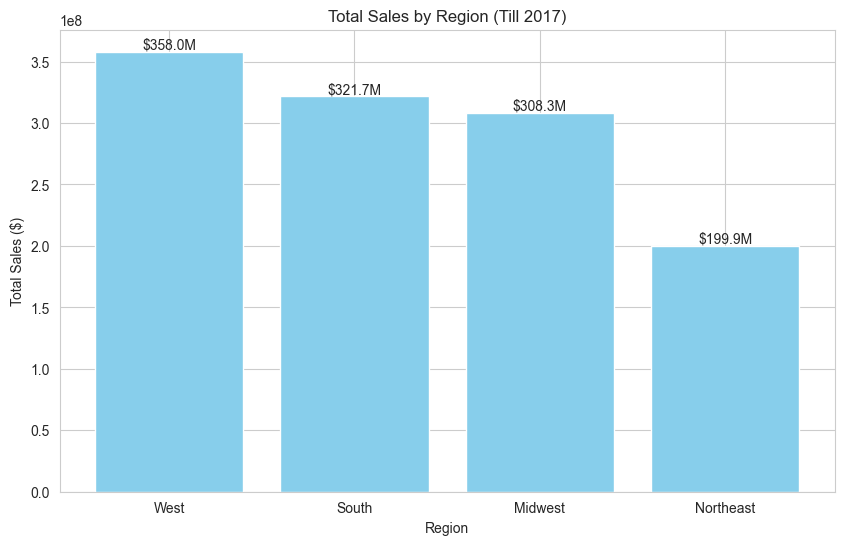

In [463]:
total_product_sales_region_sorted = total_product_sales_region.sort_values('total_sales', ascending=False)

plt.figure(figsize=(10,6))
bars = plt.bar(total_product_sales_region_sorted['Region'], total_product_sales_region_sorted['total_sales'], color='skyblue')

# Add numbers on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f"${height/1e6:.1f}M", ha='center', va='bottom', fontsize=10)

plt.title("Total Sales by Region (Till 2017)")
plt.xlabel("Region")
plt.ylabel("Total Sales ($)")
plt.show()

In [307]:
total_product_sales_region.head() # total no of sales in region

,Region,total_sales,product_sold
0,Midwest,308316740.8,15960
1,Northeast,199854856.1,10231
2,South,321673157.3,16636
3,West,357994192.3,18799


In [308]:
df_total_product_sales_region[['Line Total','Total Unit Cost','Order Quantity']]

,Line Total,Total Unit Cost,Order Quantity
0,14994.6,1824.343,6
1,25868.7,1269.918,11
2,5869.2,684.740,6
3,16368.1,1028.852,7
4,18331.2,1260.270,8
...,...,...,...
64099,21788.4,980.478,12
64100,5185.8,579.081,6
64101,43483.0,2648.510,11
64102,27717.9,2930.178,7


In [172]:
df_total_product_sales_region['Profit'] = df_total_product_sales_region['Line Total'] - df_total_product_sales_region['Total Unit Cost'] * df_total_product_sales_region['Order Quantity']
# Adding profit column to dataframe 

In [173]:
df_total_product_sales_region['Profit'].head()

0     4048.542
1    11899.602
2     1760.760
3     9166.136
4     8249.040
Name: Profit, dtype: float64

In [375]:
df_total_product_sales_region.columns

Index(['OrderNumber', 'OrderDate', 'Customer Name Index', 'Channel',
       'Currency Code', 'Warehouse Code', 'Delivery Region Index',
       'Product Description Index', 'Order Quantity', 'Unit Price',
       'Line Total', 'Total Unit Cost', 'id', 'name', 'county', 'state_code',
       'state', 'type', 'latitude', 'longitude', 'area_code', 'population',
       'households', 'median_income', 'land_area', 'water_area', 'time_zone',
       'State Code', 'State', 'Region', 'Profit', 'Year', 'Month'],
      dtype='object')

In [315]:
total_product_sales_region = df_sales_till_2017.groupby('Region').agg(
    total_sales=('Line Total', 'sum'),    
    product_sold=('Order Quantity', 'count'), 
    total_profit=('Profit', 'sum')
).reset_index()


In [316]:
total_product_sales_region.head()

,Region,total_sales,product_sold,total_profit
0,Midwest,308316740.8,15960,1.155351e+08
1,Northeast,199854856.1,10231,7.406783e+07
2,South,321673157.3,16636,1.201911e+08
3,West,357994192.3,18799,1.341243e+08


In [330]:
total_product_sales_region_sorted = total_product_sales_region.sort_values('total_profit', ascending = False)

In [178]:
total_product_sales_region_sorted # total profit for each regions

,Region,total_sales,product_sold,total_profit
3,West,372142307.6,19540,1.392671e+08
2,South,335135011.7,17333,1.251712e+08
0,Midwest,320322363.6,16588,1.200967e+08
1,Northeast,208369216.1,10643,7.723753e+07


In [182]:
df_total_product_sales_region['Year'] = df_total_product_sales_region['OrderDate'].dt.year

In [183]:
df_total_product_sales_region.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,households,median_income,land_area,water_area,time_zone,State Code,State,Region,Profit,Year
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,52798,36466,268318796,13908113,America/New York,GA,Georgia,South,4048.542,2014
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Indiana,Midwest,11899.602,2014
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,26020,124759,62489257,386195,America/Los Angeles,CA,California,West,1760.760,2014
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,30232,30019,60221613,475857,America/Indiana/Indianapolis,IN,Indiana,Midwest,9166.136,2014
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,24141,63158,70972793,720300,America/New York,CT,Connecticut,Northeast,8249.040,2014


In [326]:
total_product_sales_profit_year =  df_sales_till_2017.groupby('Year').agg(
    total_sales=('Line Total', 'sum'),    
    product_sold=('Order Quantity', 'count'), 
    total_profit=('Profit', 'sum')
).reset_index()

In [327]:
total_product_sales_profit_year.head() # total profit for each year

,Year,total_sales,product_sold,total_profit
0,2014,297520729.3,15453,1.112384e+08
1,2015,298410710.4,15473,1.119039e+08
2,2016,298083670.0,15437,1.111529e+08
3,2017,293823836.8,15263,1.096231e+08


In [322]:
df_region_year_profit = df_total_product_sales_region.groupby(['Year','Region']).agg(
    
    total_profit=('Profit', 'sum')
).reset_index()


In [323]:
df_region_year_profit.head() # Region yearly profit

,Year,Region,total_profit
0,2014,Midwest,2.897991e+07
1,2014,Northeast,1.816517e+07
2,2014,South,3.011929e+07
3,2014,West,3.397404e+07
4,2015,Midwest,2.957938e+07


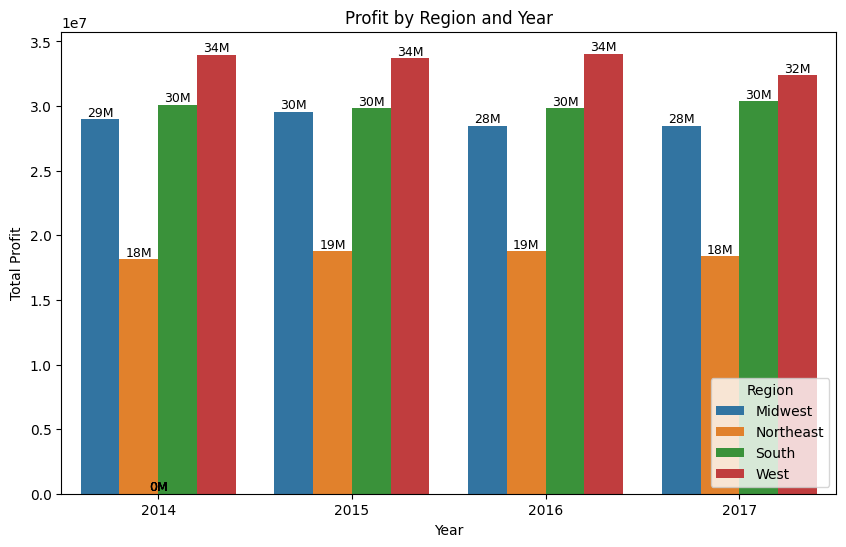

In [392]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x='Year', y='total_profit', hue='Region', data=df_region_year_profit)
plt.title('Profit by Region and Year')
plt.ylabel('Total Profit')

# Add the profit numbers on top of each bar
for p in ax.patches:
    value = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,   # x position
        value,                           # y position
        f"{value/1e6:.0f}M",             # format as millions
        ha='center', va='bottom', fontsize=9
    )

plt.show()

In [211]:
df_total_product_sales_region['Month'] = df_total_product_sales_region['OrderDate'].dt.month

In [361]:
df_total_product_sales_region['Month']

0        1
1        1
2        1
3        1
4        1
        ..
64099    2
64100    2
64101    2
64102    2
64103    2
Name: Month, Length: 64104, dtype: int32

In [377]:
df_sales_till_2017= pd.merge(df_sales_till_2017, df_products , left_on='Product Description Index', right_on='Index', how='inner')

In [387]:
df_sales_till_2017.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,water_area,time_zone,State Code,State,Region,Profit,Year,Month,Index,Product Name
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,13908113,America/New York,GA,Georgia,South,4048.542,2014,1,27,Product 27
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,1883,America/Indiana/Indianapolis,IN,Indiana,Midwest,11899.602,2014,1,20,Product 20
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,386195,America/Los Angeles,CA,California,West,1760.760,2014,1,26,Product 26
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,475857,America/Indiana/Indianapolis,IN,Indiana,Midwest,9166.136,2014,1,7,Product 7
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,720300,America/New York,CT,Connecticut,Northeast,8249.040,2014,1,8,Product 8


In [408]:
df_top_product_sales.head() # Top Sku 

,Product Name,Region,Month,total_sales,product_sold,total_profit
0,Product 1,Midwest,1,1251405.9,67,499195.694
1,Product 1,Midwest,2,1416715.0,64,548659.449
2,Product 1,Midwest,3,1102860.2,58,409895.548
3,Product 1,Midwest,4,1215225.9,69,437368.295
4,Product 1,Midwest,5,944217.6,51,377996.245


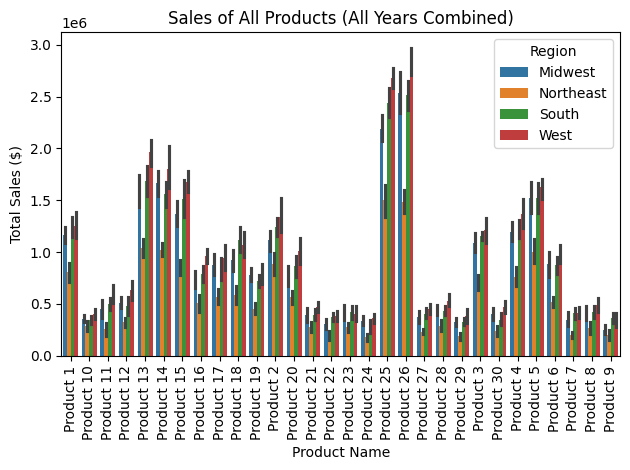

In [410]:
sns.barplot(data=df_top_product_sales, x='Product Name', y='total_sales', hue='Region')
plt.title("Sales of All Products (All Years Combined)")
plt.xlabel("Product Name")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=90)  # rotate product names
plt.legend(title='Region')
plt.tight_layout()
plt.show()

In [490]:
df_budget = all_sheets['2017 Budgets']

In [491]:
df_sales_2017 = df_sales_till_2017[df_sales_till_2017['Year'] == 2017]

In [498]:
#Compare actual 2017 product profit vs 2017 budget
profit_per_product_2017 = df_sales_2017.groupby('Product Name')['Profit'].sum().reset_index()
df_compare = pd.merge(profit_per_product_2017, df_budget, on='Product Name', how='left')
df_compare['Difference'] = df_compare['Profit'] - df_compare['2017 Budgets']
df_compare['% of Budget Achieved'] = (df_compare['Profit'] / df_compare['2017 Budgets']) * 100
df_compare_sorted = df_compare.sort_values('Profit', ascending=False)

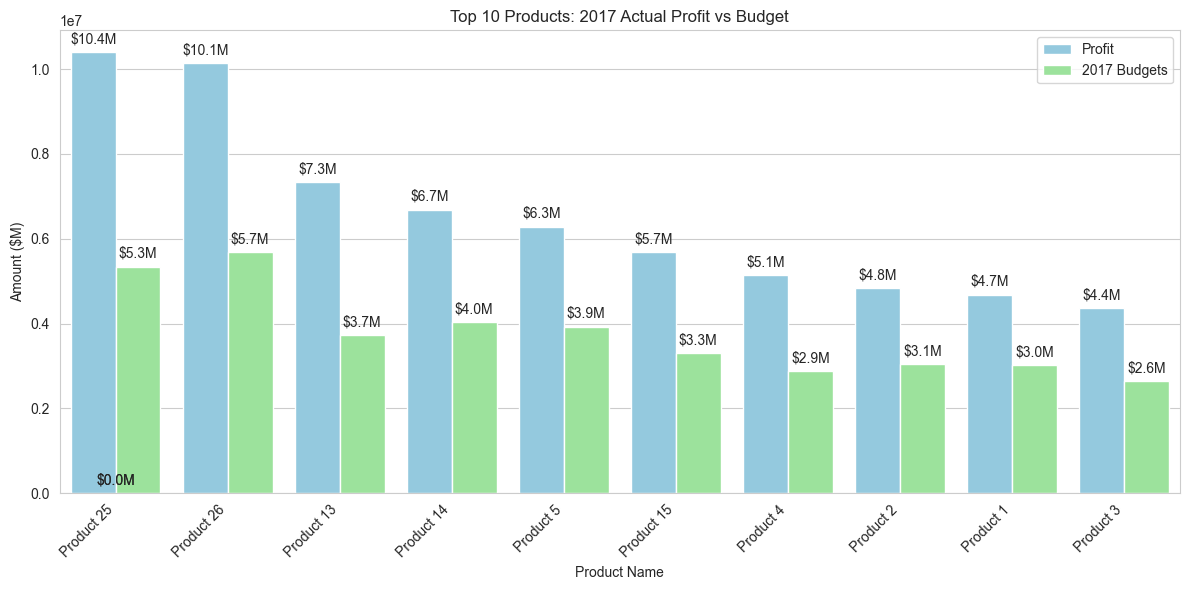

In [507]:
top_10 = df_compare_sorted.head(10)

plot_data = top_10.melt(id_vars='Product Name', value_vars=['Profit', '2017 Budgets'],
                        var_name='Type', value_name='Amount')
plt.figure(figsize=(12,6))
ax = sns.barplot(x='Product Name', y='Amount', hue='Type', data=plot_data, palette=['skyblue', 'lightgreen'])
# Add shorter numbers on top in millions (e.g., 1.2M)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 0.02*max(plot_data['Amount']),
            f"${height/1e6:.1f}M", ha='center', fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Amount ($M)')
plt.title('Top 10 Products: 2017 Actual Profit vs Budget')
plt.legend(title='')
plt.tight_layout()
plt.show()

In [411]:
df_seasonal_profit = df_sales_till_2017.groupby(['Year', 'Month', 'Region']).agg(
    total_profit=('Profit', 'sum')
).reset_index()

In [412]:
df_seasonal_profit

,Year,Month,Region,total_profit
0,2014,1,Midwest,2304302.860
1,2014,1,Northeast,1679226.427
2,2014,1,South,2760189.218
3,2014,1,West,2636934.343
4,2014,2,Midwest,2307238.331
...,...,...,...,...
187,2017,11,West,2697798.081
188,2017,12,Midwest,2343315.285
189,2017,12,Northeast,1564812.604
190,2017,12,South,2534803.161


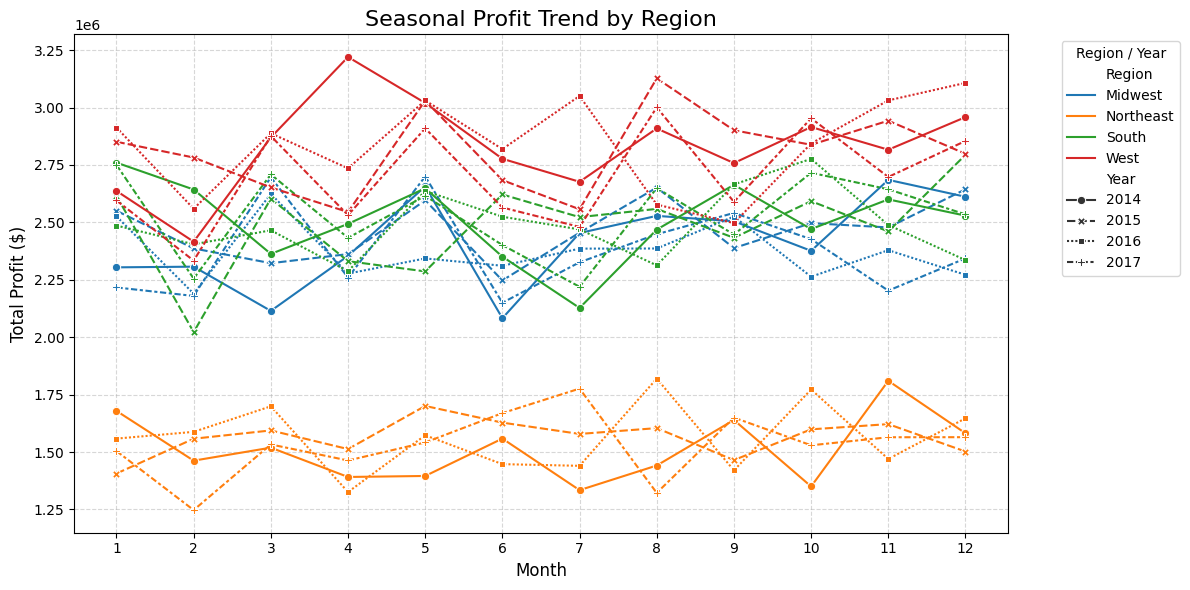

In [419]:
plt.figure(figsize=(12,6))

# Improved line chart
sns.lineplot(
    x='Month',
    y='total_profit',
    hue='Region',       # different color per region
    style='Year',       # different line style per year (if you have multiple years)
    markers=True,       # add markers to points
    data=df_seasonal_profit
)

plt.title("Seasonal Profit Trend by Region", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Profit ($)", fontsize=12)
plt.xticks(range(1,13))   # show all months
plt.legend(title='Region / Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)  # add light grid for readability
plt.tight_layout()
plt.show()


In [420]:
df_sales_till_2017

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,water_area,time_zone,State Code,State,Region,Profit,Year,Month,Index,Product Name
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,13908113,America/New York,GA,Georgia,South,4048.542,2014,1,27,Product 27
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,1883,America/Indiana/Indianapolis,IN,Indiana,Midwest,11899.602,2014,1,20,Product 20
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,386195,America/Los Angeles,CA,California,West,1760.760,2014,1,26,Product 26
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,475857,America/Indiana/Indianapolis,IN,Indiana,Midwest,9166.136,2014,1,7,Product 7
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,720300,America/New York,CT,Connecticut,Northeast,8249.040,2014,1,8,Product 8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61621,SO - 0003524,2017-12-31,125,Wholesale,USD,AXW291,635,1,9,984.9,...,1162419,America/Chicago,MO,Missouri,Midwest,4254.768,2017,12,1,Product 1
61622,SO - 0004785,2017-12-31,72,Wholesale,USD,GUT930,828,3,12,201.0,...,22089787,America/New York,PA,Pennsylvania,Northeast,1326.600,2017,12,3,Product 3
61623,SO - 0004950,2017-12-31,115,Distributor,USD,AXW291,334,6,9,3825.7,...,5153051,America/New York,FL,Florida,South,6541.947,2017,12,6,Product 6
61624,SO - 0006829,2017-12-31,41,Distributor,USD,GUT930,259,6,5,1835.8,...,10218658,America/New York,CT,Connecticut,Northeast,4314.130,2017,12,6,Product 6


In [421]:
df_channel_profit = df_sales_till_2017.groupby('Channel').agg(
    total_sales=('Line Total', 'sum'),
    total_profit=('Profit', 'sum')
).reset_index()

In [422]:
df_channel_profit.head()


,Channel,total_sales,total_profit
0,Distributor,372247598.1,1.401153e+08
1,Export,173373253.5,6.592892e+07
2,Wholesale,642218094.9,2.378741e+08


In [423]:
df_channel_profit = df_channel_profit.sort_values('total_profit', ascending=False)

In [424]:
df_channel_profit.head()

,Channel,total_sales,total_profit
2,Wholesale,642218094.9,2.378741e+08
0,Distributor,372247598.1,1.401153e+08
1,Export,173373253.5,6.592892e+07


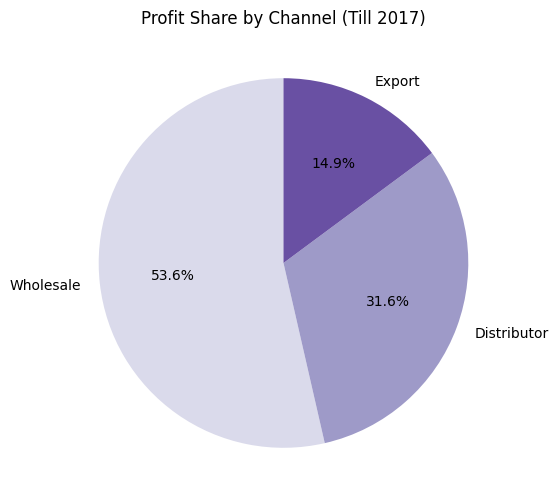

In [427]:
plt.figure(figsize=(6,6))
plt.pie(
    df_channel_profit['total_profit'],
    labels=df_channel_profit['Channel'],
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('Purples', len(df_channel_profit))
)
plt.title("Profit Share by Channel (Till 2017)")
plt.show()

In [428]:
df_channel_profit_year = df_sales_till_2017.groupby(['Year','Channel']).agg(
    total_sales=('Line Total', 'sum'),
    total_profit=('Profit', 'sum')
).reset_index()


In [429]:
df_channel_profit_year.head()

,Year,Channel,total_sales,total_profit
0,2014,Distributor,93704123.0,3.528226e+07
1,2014,Export,42523928.5,1.610613e+07
2,2014,Wholesale,161292677.8,5.985002e+07
3,2015,Distributor,92229131.4,3.466333e+07
4,2015,Export,44028453.7,1.690458e+07


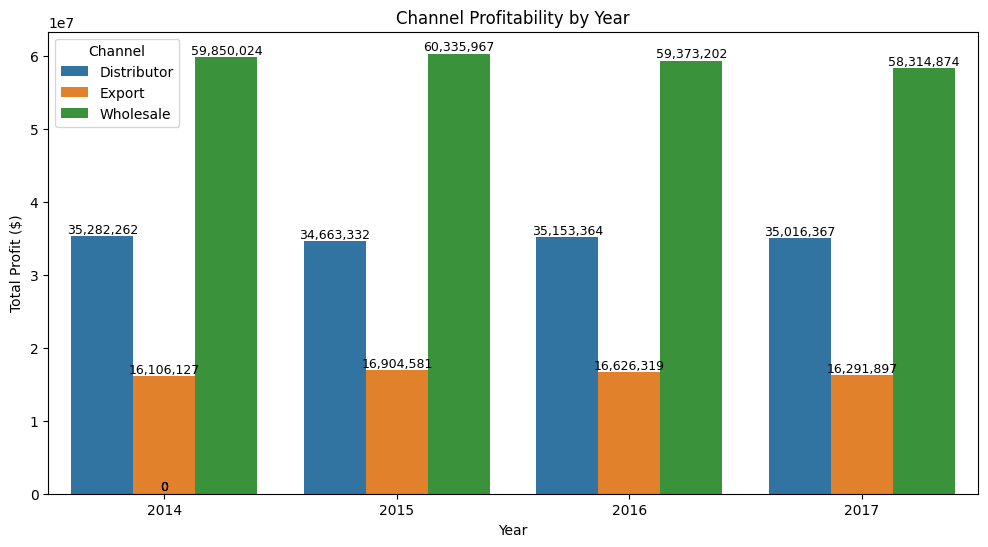

In [430]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x='Year', y='total_profit', hue='Channel', data=df_channel_profit_year)

plt.title("Channel Profitability by Year")
plt.ylabel("Total Profit ($)")

# Add profit numbers on top of each bar
for p in ax.patches:
    value = p.get_height()
    ax.annotate(f'{value:,.0f}',   # formatted with commas
                (p.get_x() + p.get_width() / 2., value),
                ha='center', va='bottom', fontsize=9, color='black', rotation=0)

plt.show()

In [433]:
df_region_channel_profit = df_sales_till_2017.groupby(['Region','Channel']).agg(
    total_profit=('Profit','sum')
).reset_index()

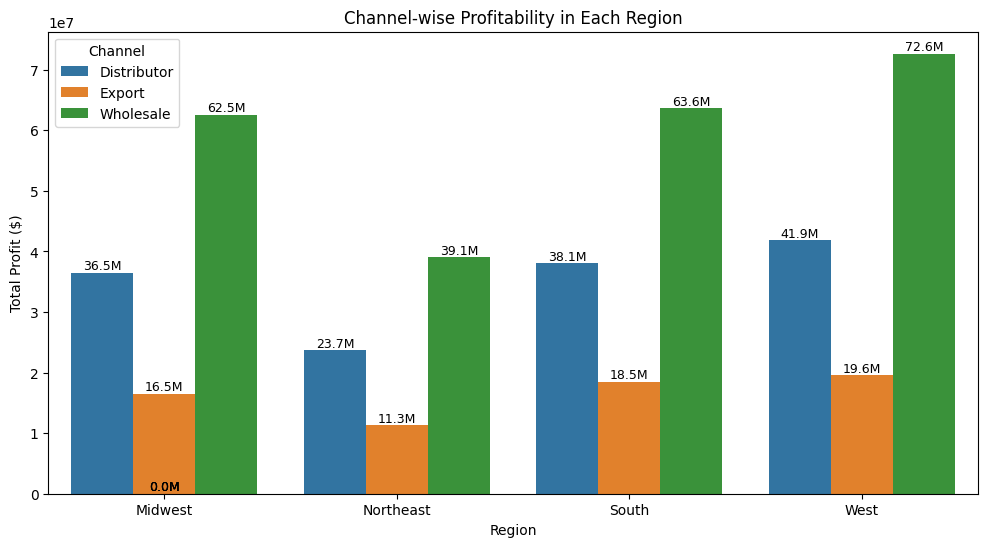

In [434]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x='Region', y='total_profit', hue='Channel', data=df_region_channel_profit)

plt.title("Channel-wise Profitability in Each Region")
plt.ylabel("Total Profit ($)")

# Add numbers on bars (in millions)
for p in ax.patches:
    value = p.get_height()
    ax.annotate(f'{value/1e6:.1f}M',
                (p.get_x() + p.get_width() / 2., value),
                ha='center', va='bottom', fontsize=9, color='black', rotation=0)

plt.show()